In [ ]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="****",
    database="sakila"
)

cursor = conn.cursor()

cursor.execute("SHOW TABLES")
tables = [table[0] for table in cursor.fetchall()]

dataframes = {}

for table in tables:
    query = f"SELECT * FROM {table}"
    cursor.execute(query)
    
    columns = [col[0] for col in cursor.description]
    
    data = cursor.fetchall()
    
    dataframes[table] = pd.DataFrame(data, columns=columns)
    print(f"✅ Loaded table: {table}")


cursor.close()
conn.close()

✅ Loaded table: actor
✅ Loaded table: actor_info
✅ Loaded table: address
✅ Loaded table: category
✅ Loaded table: city
✅ Loaded table: country
✅ Loaded table: customer
✅ Loaded table: customer_list
✅ Loaded table: film
✅ Loaded table: film_actor
✅ Loaded table: film_category
✅ Loaded table: film_list
✅ Loaded table: film_text
✅ Loaded table: inventory
✅ Loaded table: language
✅ Loaded table: nicer_but_slower_film_list
✅ Loaded table: payment
✅ Loaded table: rental
✅ Loaded table: sales_by_film_category
✅ Loaded table: sales_by_store
✅ Loaded table: staff
✅ Loaded table: staff_list
✅ Loaded table: store


### TABLES: 
#### 1-actor, 2-address, 3-category, 4-city, 5-country, 6-customer, 7-film, 8-film_actor, 9-film_category,
#### 10-film_text, 11-inventory, 12-language, 13-payment, 14-rental, 15-staff, 16-store
### VIEWS: 
#### 1-actor_info, 2-customer_list, 3-film_list, 4-nicer_but_slower_film_list, 
#### 5-sales_by_film_category, 6-sales_by_store, 7-staff_list

---

## Import libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ↝↝ *Top 10 Customers with Most Rentals* ↜↜

### Convert needed tables to pandas dataframe to start visualization:

In [47]:
customer_df = pd.DataFrame(dataframes['customer'])
customer_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [48]:
rental_df = pd.DataFrame(dataframes['rental'])
rental_df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [49]:
# merge two dataframes on common column
customer_rental_df = pd.merge(customer_df, rental_df, on='customer_id')

# add new column
customer_rental_df['name'] = customer_rental_df['first_name'] + ' ' + customer_rental_df['last_name']
customer_rental_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update_x,rental_id,rental_date,inventory_id,return_date,staff_id,last_update_y,name
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,76,2005-05-25 11:30:37,3021,2005-06-03 12:00:37,2,2006-02-15 21:30:53,MARY SMITH
1,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,573,2005-05-28 10:35:23,4020,2005-06-03 06:32:23,1,2006-02-15 21:30:53,MARY SMITH
2,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,1185,2005-06-15 00:54:12,2785,2005-06-23 02:42:12,2,2006-02-15 21:30:53,MARY SMITH
3,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,1422,2005-06-15 18:02:53,1021,2005-06-19 15:54:53,2,2006-02-15 21:30:53,MARY SMITH
4,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,1476,2005-06-15 21:08:46,1407,2005-06-25 02:26:46,1,2006-02-15 21:30:53,MARY SMITH


In [50]:
customer_rental_grouped = customer_rental_df.groupby(['customer_id', 'name'])['rental_id'].agg('count').reset_index()
customer_rental_grouped = pd.DataFrame(customer_rental_grouped)    # convert dataseries to dataframe
customer_rental_grouped.rename(columns={'rental_id': 'rental_count'}, inplace=True)
customer_rental_grouped['customer'] = customer_rental_grouped['name'] + ' (ID: ' + customer_rental_grouped['customer_id'].astype(str) + ')'    # add new column
customer_rental_grouped[['customer', 'rental_count']].head()

,customer,rental_count
0,MARY SMITH (ID: 1),32
1,PATRICIA JOHNSON (ID: 2),27
2,LINDA WILLIAMS (ID: 3),26
3,BARBARA JONES (ID: 4),22
4,ELIZABETH BROWN (ID: 5),38


,customer,rental_count
147,ELEANOR HUNT (ID: 148),46
525,KARL SEAL (ID: 526),45
143,CLARA SHAW (ID: 144),42
235,MARCIA DEAN (ID: 236),42
74,TAMMY SANDERS (ID: 75),41
468,WESLEY BULL (ID: 469),40
196,SUE PETERS (ID: 197),40
467,TIM CARY (ID: 468),39
177,MARION SNYDER (ID: 178),39
136,RHONDA KENNEDY (ID: 137),39


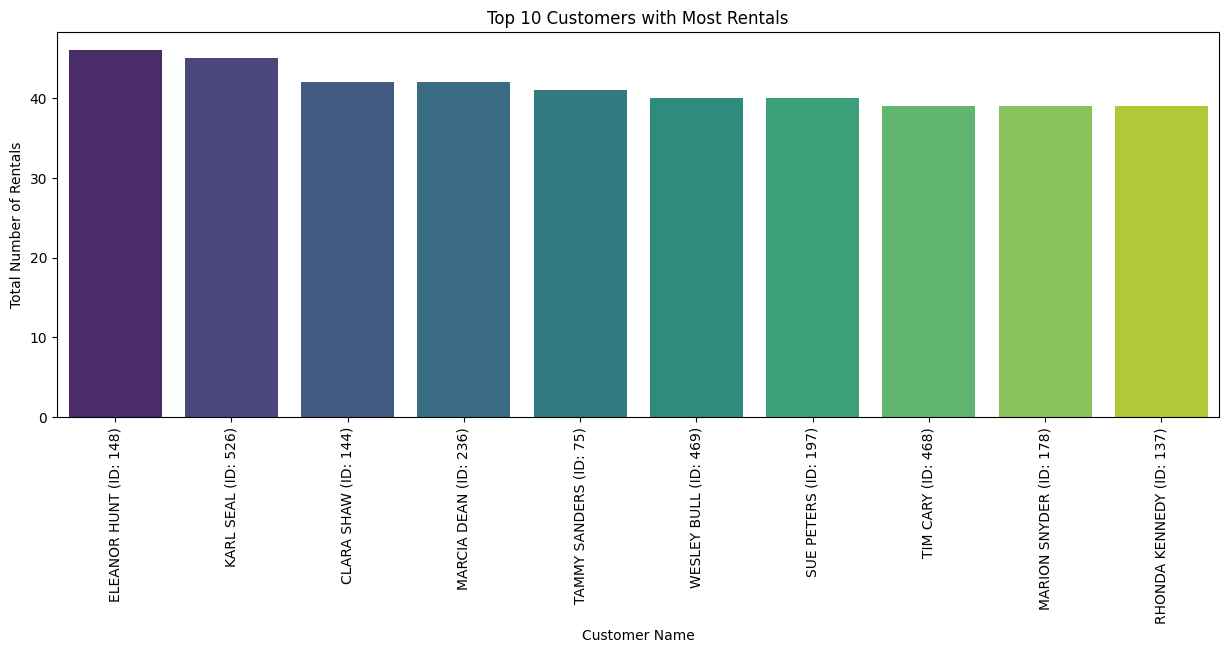

In [51]:
top_10_c_r = customer_rental_grouped.sort_values('rental_count',ascending=False).head(10)
display(top_10_c_r[['customer', 'rental_count']])

plt.figure(figsize=(15,5))
sns.barplot(x='customer', y='rental_count', 
            data=top_10_c_r, order=top_10_c_r.sort_values('rental_count', ascending=False).customer,
            palette="viridis")
plt.title("Top 10 Customers with Most Rentals")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Rentals")
plt.show()

,customer,rental_count
317,BRIAN WYMAN (ID: 318),12
280,LEONA OBRIEN (ID: 281),14
109,TIFFANY JORDAN (ID: 110),14
60,KATHERINE RIVERA (ID: 61),14
135,ANITA MORALES (ID: 136),15
247,CAROLINE BOWMAN (ID: 248),15
491,LESTER KRAUS (ID: 492),16
163,JOANN GARDNER (ID: 164),16
463,JEROME KENYON (ID: 464),16
397,ANTONIO MEEK (ID: 398),16


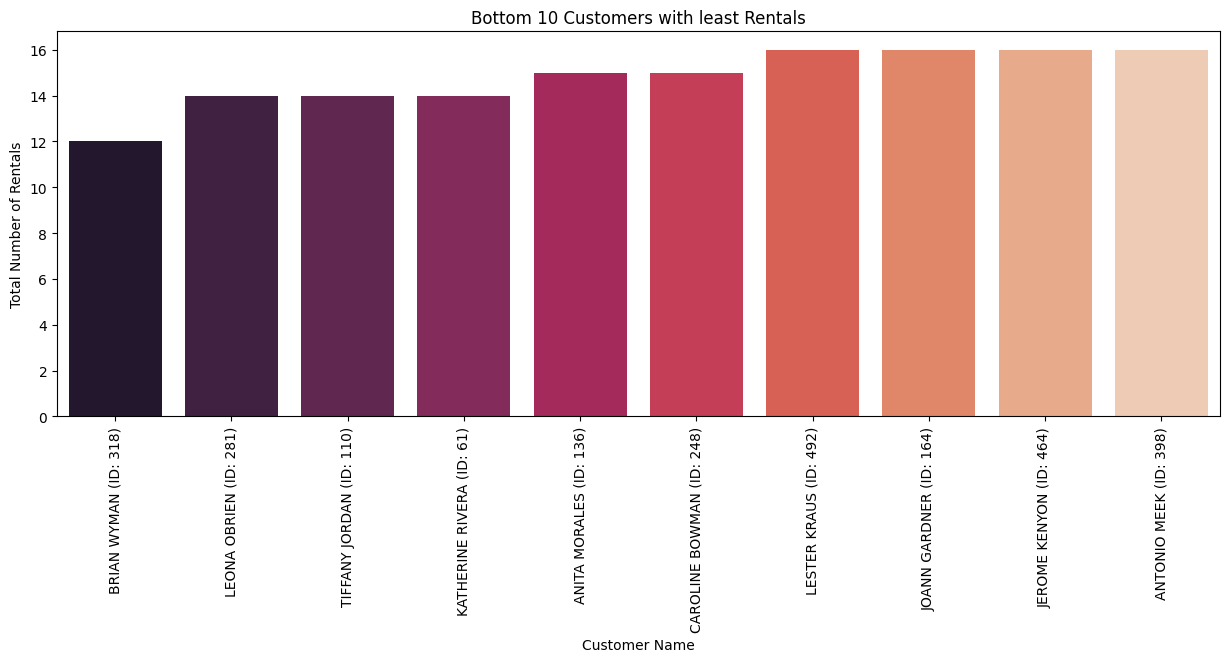

In [8]:
bottom_10_c_r = customer_rental_grouped.sort_values('rental_count',ascending=True).head(10)
display(bottom_10_c_r[['customer', 'rental_count']])

plt.figure(figsize=(15,5))
sns.barplot(x='customer', y='rental_count', 
            data=bottom_10_c_r, order=bottom_10_c_r.sort_values('rental_count', ascending=True).customer,
            palette="rocket")
plt.title("Bottom 10 Customers with least Rentals")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Rentals")
plt.show()

### From this plots, we can identify loyal customers and notify them when new films are added. On the other hand, by finding customers who have made the least rentals, we can give them discounts to encourage them to rent film.

In [9]:
# output the dataframe as csv file

customer_rental_grouped.to_csv('../CSV/customer_rental.csv', index=False)

---

### ↝↝ *Classify Customers based on their Payment* ↜↜

In [10]:
import numpy as np

In [11]:
payment_df = pd.DataFrame(dataframes['payment'])
payment_df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [12]:
payment_grouped = payment_df.groupby(['customer_id']).agg(total_amount=('amount', 'sum'), rental_count=('rental_id', 'count'))
payment_grouped = payment_grouped.reset_index()
payment_grouped.head()

,customer_id,total_amount,rental_count
0,1,118.68,32
1,2,128.73,27
2,3,135.74,26
3,4,81.78,22
4,5,144.62,38


In [13]:
payment_final_df = payment_df.merge(payment_grouped[['customer_id', 'total_amount', 'rental_count']], on='customer_id', how='left')
payment_final_df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,total_amount,rental_count
0,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30,118.68,32
1,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30,118.68,32
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30,118.68,32
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30,118.68,32
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30,118.68,32


In [14]:
min_amount = min(payment_final_df['amount'])
max_amount = max(payment_final_df['amount'])
print('min:' , min_amount)
print('max:' , max_amount)

min: 0.00
max: 11.99


### Based on min and max value of total paymet for each customer, divide them to 6 groups

In [15]:
# add class column

# divide dataset to 6 classes: from A to F
# A is records with high amount and E is records with low amount 

class_width = (max_amount - min_amount) / 6

conditions = [
    (payment_final_df['amount'] <= min_amount + class_width),  # Class F
    (payment_final_df['amount'] > min_amount + class_width) & (payment_final_df['amount'] <= min_amount + 2*class_width),  # Class E
    (payment_final_df['amount'] > min_amount + 2*class_width) & (payment_final_df['amount'] <= min_amount + 3*class_width),  # Class D
    (payment_final_df['amount'] > min_amount + 3*class_width) & (payment_final_df['amount'] <= min_amount + 4*class_width),  # Class C
    (payment_final_df['amount'] > min_amount + 4*class_width) & (payment_final_df['amount'] <= min_amount + 5*class_width),  # Class B
    (payment_final_df['amount'] > min_amount + 5*class_width)  # Class A
]

choices = ['F', 'E', 'D', 'C', 'B', 'A']

payment_final_df['class'] = np.select(conditions, choices)

payment_final_df.tail(20)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,total_amount,rental_count,class
16024,16030,598,1,15443,7.99,2005-08-23 00:44:15,2006-02-15 22:24:08,83.78,22,C
16025,16031,599,2,1008,4.99,2005-05-31 01:18:56,2006-02-15 22:24:09,83.81,19,D
16026,16032,599,1,2272,1.99,2005-06-18 06:29:53,2006-02-15 22:24:09,83.81,19,F
16027,16033,599,2,3043,6.99,2005-06-20 12:38:35,2006-02-15 22:24:09,83.81,19,C
16028,16034,599,2,3398,4.99,2005-06-21 15:34:38,2006-02-15 22:24:09,83.81,19,D
16029,16035,599,1,3429,6.99,2005-06-21 18:46:05,2006-02-15 22:24:09,83.81,19,C
16030,16036,599,1,5065,0.99,2005-07-09 04:42:00,2006-02-15 22:24:10,83.81,19,F
16031,16037,599,1,5843,2.99,2005-07-10 17:14:27,2006-02-15 22:24:10,83.81,19,E
16032,16038,599,2,6800,9.99,2005-07-12 17:03:56,2006-02-15 22:24:10,83.81,19,B
16033,16039,599,2,6895,2.99,2005-07-12 21:23:59,2006-02-15 22:24:10,83.81,19,E


In [16]:
payment_final_df = payment_final_df.drop_duplicates(subset='customer_id', keep='last')
payment_final_df

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,total_amount,rental_count,class
31,32,1,1,15315,5.99,2005-08-22 20:03:46,2006-02-15 22:12:30,118.68,32,D
58,59,2,2,15907,4.99,2005-08-23 17:39:35,2006-02-15 22:12:30,128.73,27,D
84,85,3,1,15619,2.99,2005-08-23 07:10:14,2006-02-15 22:12:30,135.74,26,E
106,107,4,2,15635,1.99,2005-08-23 07:43:00,2006-02-15 22:12:30,81.78,22,F
144,145,5,2,13209,0.99,2006-02-14 15:16:03,2006-02-15 22:12:30,144.62,38,F
...,...,...,...,...,...,...,...,...,...,...
15949,15955,595,2,16016,2.99,2005-08-23 21:26:35,2006-02-15 22:23:50,117.70,30,E
15977,15983,596,1,15423,0.99,2006-02-14 15:16:03,2006-02-15 22:23:57,96.72,28,F
16002,16008,597,1,11652,4.99,2006-02-14 15:16:03,2006-02-15 22:24:03,99.75,25,D
16024,16030,598,1,15443,7.99,2005-08-23 00:44:15,2006-02-15 22:24:08,83.78,22,C


In [17]:
# split dataframe to train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(payment_final_df.iloc[:, :-1], payment_final_df.iloc[:, -1], 
                                                    random_state=42, test_size=0.25)

# select columns that classification is based on them
X_train = X_train[['amount', 'total_amount']]
X_test = X_test[['amount', 'total_amount']]

### Training two models on this data: 1-KNN 2-Decision Tree

### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [19]:
from sklearn.metrics import f1_score, accuracy_score, precision_score

y_pred_knn = model_knn.predict(X_test)
print('metrics for KNN model:')
print('f1_score:', f1_score(y_test, y_pred_knn, average='weighted'))
print('accuracy_score:', accuracy_score(y_test, y_pred_knn))
print('precision_score:', precision_score(y_test, y_pred_knn, average='weighted'))

metrics for KNN model:
f1_score: 0.777528399454891
accuracy_score: 0.7933333333333333
precision_score: 0.7743655693889112


d:\Job\task\tenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
from sklearn.metrics import f1_score, accuracy_score, precision_score

y_pred_dt = model_dt.predict(X_test)
print('metrics for Decision Tree model:')
print('f1_score:', f1_score(y_test, y_pred_dt, average='weighted'))
print('accuracy_score:', accuracy_score(y_test, y_pred_dt))
print('precision_score:', precision_score(y_test, y_pred_dt, average='weighted'))

metrics for Decision Tree model:
f1_score: 0.9903030303030304
accuracy_score: 0.9933333333333333
precision_score: 0.9877777777777779


d:\Job\task\tenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree has greater accuracy but It can be because overfitting.

### The purpose of this classification is to give a discount coupon for the next rental, based on the amount paid this time and the total payment history so far, if it is in a higher class, such as A or B.

In [22]:
# output the dataframe as csv file

payment_final_df.to_csv('../CSV/payment_final.csv', index=False)

---

### ↝↝ *Film Rental in Iran* ↜↜

In [23]:
country_df = pd.DataFrame(dataframes['country'])
country_df.head()

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 04:44:00
1,2,Algeria,2006-02-15 04:44:00
2,3,American Samoa,2006-02-15 04:44:00
3,4,Angola,2006-02-15 04:44:00
4,5,Anguilla,2006-02-15 04:44:00


In [24]:
Iran_country_df = country_df[country_df['country']=='Iran']
Iran_country_df

,country_id,country,last_update
45,46,Iran,2006-02-15 04:44:00


In [25]:
city_df = pd.DataFrame(dataframes['city'])
city_df.head()

,city_id,city,country_id,last_update
0,1,A Coruña (La Coruña),87,2006-02-15 04:45:25
1,2,Abha,82,2006-02-15 04:45:25
2,3,Abu Dhabi,101,2006-02-15 04:45:25
3,4,Acuña,60,2006-02-15 04:45:25
4,5,Adana,97,2006-02-15 04:45:25


In [26]:
address_df = pd.DataFrame(dataframes['address'])
address_df.head()

,address_id,address,address2,district,city_id,postal_code,phone,location,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00>\n2]c4\...,2014-09-25 22:30:27
1,2,28 MySQL Boulevard,None,QLD,576,,,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x8e\x10...,2014-09-25 22:30:09
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xcd\xc4...,2014-09-25 22:30:27
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00[\r\xe44...,2014-09-25 22:30:09
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00(\xd17\x...,2014-09-25 22:31:53


### Merge these three dataframes to have complete address information

In [27]:
Iran_df = Iran_country_df.merge(city_df, on='country_id', how='inner').merge(address_df, on='city_id', how='inner')
Iran_df

,country_id,country,last_update_x,city_id,city,last_update_y,address_id,address,address2,district,postal_code,phone,location,last_update
0,46,Iran,2006-02-15 04:44:00,31,Arak,2006-02-15 04:45:25,40,334 Munger (Monghyr) Lane,,Markazi,38145,481183273622,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00sru\xb66...,2014-09-25 22:31:36
1,46,Iran,2006-02-15 04:44:00,162,Esfahan,2006-02-15 04:45:25,14,1531 Sal Drive,,Esfahan,53628,648856936185,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xde\tQ\...,2014-09-25 22:31:36
2,46,Iran,2006-02-15 04:44:00,265,Kermanshah,2006-02-15 04:45:25,382,220 Hidalgo Drive,,Kermanshah,45298,342720754566,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00Nz\x84?h...,2014-09-25 22:31:37
3,46,Iran,2006-02-15 04:44:00,356,Najafabad,2006-02-15 04:45:25,373,1922 Miraj Way,,Esfahan,13203,320471479776,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x17\x05...,2014-09-25 22:31:37
4,46,Iran,2006-02-15 04:44:00,423,Qomsheh,2006-02-15 04:45:25,464,76 Kermanshah Manor,,Esfahan,23343,762361821578,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xfff\x1...,2014-09-25 22:31:37
5,46,Iran,2006-02-15 04:44:00,467,Shahr-e Kord,2006-02-15 04:45:25,189,927 Barcelona Street,,Chaharmahal va Bakht,65121,951486492670,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\x00\x00...,2014-09-25 22:31:38
6,46,Iran,2006-02-15 04:44:00,481,Sirjan,2006-02-15 04:45:25,454,956 Nam Dinh Manor,,Kerman,21872,474047727727,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xf1b\x0...,2014-09-25 22:31:39
7,46,Iran,2006-02-15 04:44:00,514,Tabriz,2006-02-15 04:45:25,284,600 Bradford Street,,East Azerbaidzan,96204,117592274996,b'\x00\x00\x00\x00\x01\x01\x00\x00\x00\xeeN-\x...,2014-09-25 22:31:40


### Load other needed tables

In [28]:
customer_df = pd.DataFrame(dataframes['customer'])
customer_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [29]:
rental_df = pd.DataFrame(dataframes['rental'])
rental_df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


### Merge these three datasets to have informations we need in one datarame

In [30]:
merged_df = Iran_df.merge(customer_df, on='address_id', how='inner').merge(rental_df, on='customer_id', how='inner')
merged_df.columns

d:\Job\task\tenv\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'last_update_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


Index(['country_id', 'country', 'last_update_x', 'city_id', 'city',
       'last_update_y', 'address_id', 'address', 'address2', 'district',
       'postal_code', 'phone', 'location', 'last_update_x', 'customer_id',
       'store_id', 'first_name', 'last_name', 'email', 'active', 'create_date',
       'last_update_y', 'rental_id', 'rental_date', 'inventory_id',
       'return_date', 'staff_id', 'last_update'],
      dtype='object')

In [31]:
final_df = merged_df[['city', 'rental_date', 'rental_id']]
final_df.sort_values('rental_date')

,city,rental_date,rental_id
113,Qomsheh,2005-05-24 22:54:33,2
151,Shahr-e Kord,2005-05-25 01:48:41,20
78,Najafabad,2005-05-25 09:21:29,64
79,Najafabad,2005-05-25 20:48:50,125
152,Shahr-e Kord,2005-05-26 00:55:56,154
...,...,...,...
26,Arak,2005-08-23 08:42:40,15657
150,Qomsheh,2005-08-23 14:52:50,15814
76,Kermanshah,2005-08-23 20:29:56,15995
77,Kermanshah,2005-08-23 20:44:10,15999


In [32]:
final_df['rental_year'] = final_df['rental_date'].dt.year
final_df.head()

C:\Users\Debug\AppData\Local\Temp\ipykernel_2912\2799814471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['rental_year'] = final_df['rental_date'].dt.year


,city,rental_date,rental_id,rental_year
0,Arak,2005-05-27 04:53:11,349,2005
1,Arak,2005-05-29 04:35:29,716,2005
2,Arak,2005-06-19 16:05:41,2741,2005
3,Arak,2005-07-07 08:15:03,4135,2005
4,Arak,2005-07-08 04:58:48,4560,2005


In [33]:
# check if we cak use year for analysis
final_df['rental_date'].dt.year.value_counts()

2005    224
2006      1
Name: rental_date, dtype: int64

### Almost all rentals are in 2005, so we use another feature

In [34]:
city_grouped_df = final_df.groupby(['city'])['rental_id'].agg('count')
city_grouped_df = pd.DataFrame(city_grouped_df.reset_index())
city_grouped_df.rename(columns={'rental_id': 'rental_count'}, inplace=True)
city_grouped_df

,city,rental_count
0,Arak,27
1,Esfahan,25
2,Kermanshah,26
3,Najafabad,35
4,Qomsheh,38
5,Shahr-e Kord,23
6,Sirjan,20
7,Tabriz,31


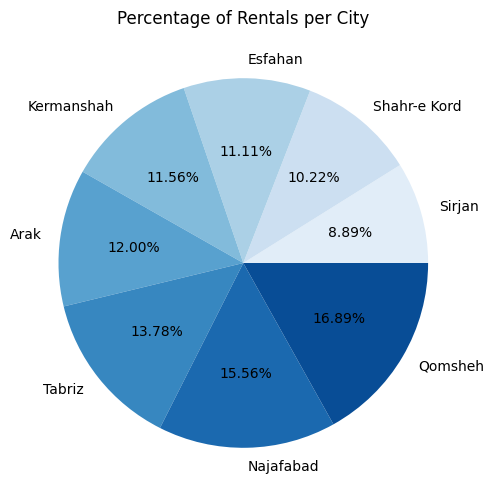

In [35]:
city_sorted_df = city_grouped_df.sort_values('rental_count')

plt.figure(figsize=(6,6))
plt.pie(city_sorted_df['rental_count'], labels=city_sorted_df['city'], autopct='%1.2f%%', colors=sns.color_palette('Blues', len(city_sorted_df)))
plt.title('Percentage of Rentals per City')
plt.show()

### The percentage of movie rentals by Iranian cities is shown in this pie chart. Darker colors indicate higher percentages and lighter colors indicate lower percentages.

In [36]:
# output the dataframe as csv file

city_grouped_df.to_csv('../CSV/Iran_city.csv', index=False)

---

## Correlation Analysis

In [37]:
# add dataframes that didn't load previously

film_df = pd.DataFrame(dataframes['film'])
inventory_df = pd.DataFrame(dataframes['inventory'])
film_category_df = pd.DataFrame(dataframes['film_category'])
category_df = pd.DataFrame(dataframes['category'])

In [38]:
corr_merged_df = rental_df.merge(inventory_df, on='inventory_id', how='inner'
                                 ).merge(customer_df, on='customer_id', how='inner'
                                         ).merge(film_df, on='film_id', how='inner'
                                                 ).merge(film_category_df, on='film_id', how='inner'
                                                         ).merge(category_df, on='category_id', how='inner')
corr_merged_df.columns

d:\Job\task\tenv\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'last_update_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


Index(['rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'last_update_x', 'film_id', 'store_id_x',
       'last_update_y', 'store_id_y', 'first_name', 'last_name', 'email',
       'address_id', 'active', 'create_date', 'last_update_x', 'title',
       'description', 'release_year', 'language_id', 'original_language_id',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'last_update_y', 'category_id',
       'last_update_x', 'name', 'last_update_y'],
      dtype='object')

In [39]:
corr_df = corr_merged_df[['film_id', 'rental_id', 'rental_rate', 'rating', 'category_id', 'name']]
corr_df.rename(columns={'name': 'category_name'}, inplace=True)
corr_df.head()

d:\Job\task\tenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,film_id,rental_id,rental_rate,rating,category_id,category_name
0,80,1,2.99,G,8,Family
1,80,1577,2.99,G,8,Family
2,80,3584,2.99,G,8,Family
3,80,10507,2.99,G,8,Family
4,80,13641,2.99,G,8,Family


In [40]:
# output the dataframe as csv file

corr_df.to_csv('../CSV/correlation.csv', index=False)

### Try to find relation between rental_count and rental_rate for each category

In [41]:
corr_rental1_df = corr_df.groupby(['category_name']).agg(rental_count=('rental_id', 'count'), avg_rate=('rental_rate', 'mean'))
corr_rental1_df = pd.DataFrame(corr_rental1_df.reset_index())
corr_rental1_df

,category_name,rental_count,avg_rate
0,Action,1112,2.668058
1,Animation,1166,2.760154
2,Children,945,2.689471
3,Classics,939,2.638562
4,Comedy,941,3.283305
5,Documentary,1050,2.616667
6,Drama,1060,3.182453
7,Family,1096,2.699854
8,Foreign,1033,2.953214
9,Games,969,3.130351


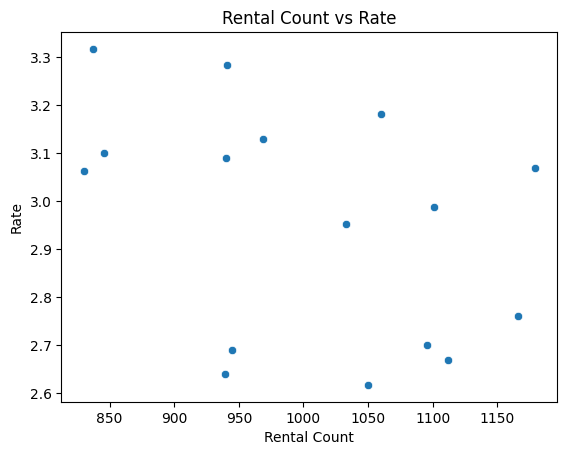

In [42]:
sns.scatterplot(x=corr_rental1_df['rental_count'], y=corr_rental1_df['avg_rate'])
plt.xlabel('Rental Count')
plt.ylabel('Rate')
plt.title('Rental Count vs Rate')
plt.show()

### Try to find relation between rental_count and rental_rate for each Rating

In [43]:
corr_rental2_df = corr_df.groupby(['rating']).agg(rental_count=('rental_id', 'count'), avg_rate=('rental_rate', 'mean'))
corr_rental2_df = pd.DataFrame(corr_rental2_df.reset_index())
corr_rental2_df

,rating,rental_count,avg_rate
0,G,2773,2.839982
1,NC-17,3293,3.055594
2,PG,3212,2.947036
3,PG-13,3585,3.011757
4,R,3181,2.832817


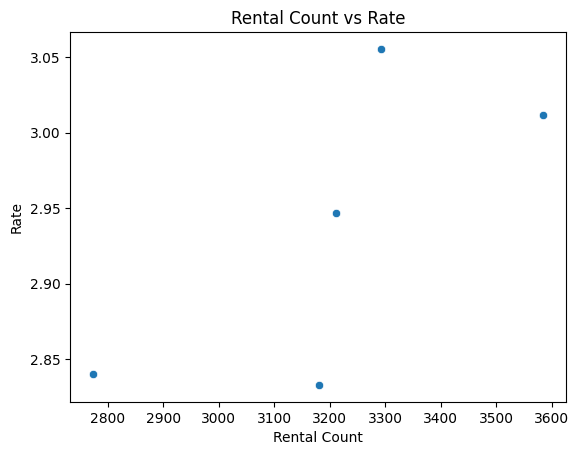

In [44]:
sns.scatterplot(x=corr_rental2_df['rental_count'], y=corr_rental2_df['avg_rate'])
plt.xlabel('Rental Count')
plt.ylabel('Rate')
plt.title('Rental Count vs Rate')
plt.show()

### Both plots don't show a specific relationship between the number of "rentals" and the "rating" for the respective category.

---